In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('channel.csv')


In [3]:
df.head()

,sr.no,tv,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

In [5]:
df.columns

Index(['sr.no', 'tv', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:
df.isnull().sum()

sr.no        0
tv           0
radio        0
newspaper    0
sales        0
dtype: int64

in that dataset there are no such null values so we go through the next stape of the data EDA process

# EDA

<AxesSubplot:xlabel='tv', ylabel='sales'>

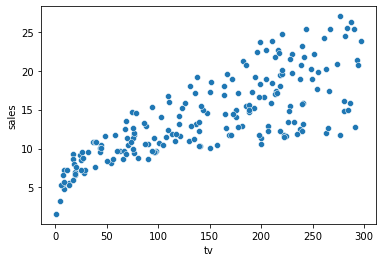

In [7]:
sns.scatterplot(x='tv', y='sales', data=df)

in that above graph we see that the when the tv advertisment is add or increses then the sales are linearly increses

<AxesSubplot:xlabel='radio', ylabel='sales'>

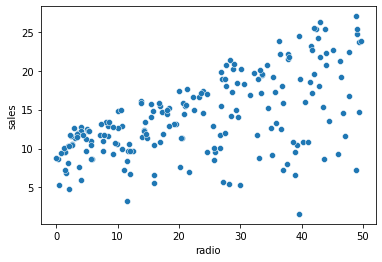

In [8]:
sns.scatterplot(x='radio', y='sales', data=df)

in this graph we see that there are not all case are increses when the radio advt. increses

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

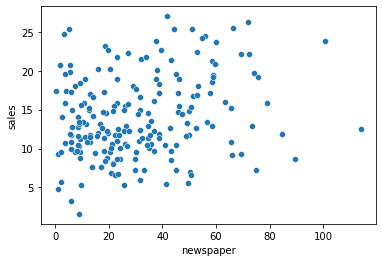

In [9]:
sns.scatterplot(x='newspaper', y='sales', data=df)

in this graph we see that when the newspaper advt are less there are sales rate is high 

In [10]:
df=df.drop('sr.no', axis=1)

In [11]:
df

,tv,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [12]:
df.corr()

,tv,radio,newspaper,sales
tv,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [13]:
df.corr()['sales'].sort_values()

newspaper    0.228299
radio        0.576223
tv           0.782224
sales        1.000000
Name: sales, dtype: float64

in this correlation point we see that the correlation with the tv and the radio are extremly good .

<AxesSubplot:>

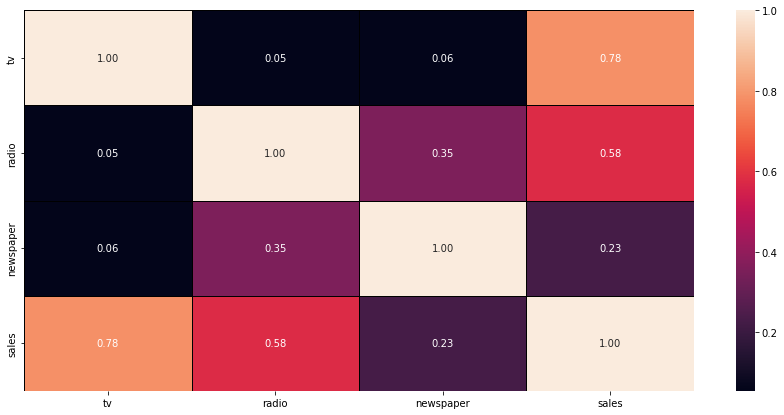

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True , linewidth=0.5 , linecolor='black', fmt='.2f')

# describing of the dataset

In [15]:
df.describe()

,tv,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

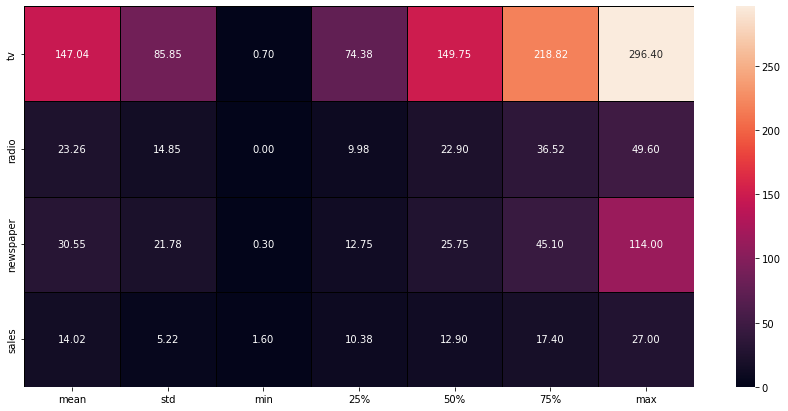

In [16]:
plt.figure(figsize=(15,7))
sns.heatmap(round(df.describe()[1:].transpose(),2), annot=True , linewidth=0.5 , linecolor='black', fmt='.2f')

we see that the there are no such outliers are present except the newspaper we solve the outliers using the boxplot and solve using zscore

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tv         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<AxesSubplot:>

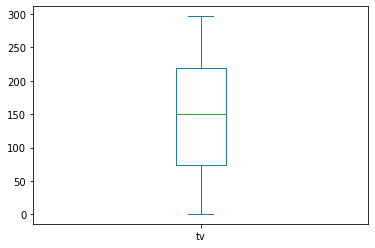

In [18]:
df['tv'].plot.box()

<AxesSubplot:>

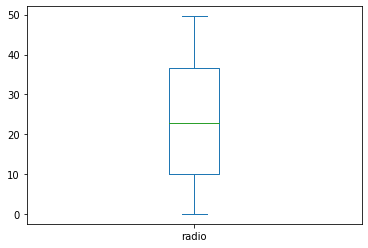

In [19]:
df['radio'].plot.box()

<AxesSubplot:>

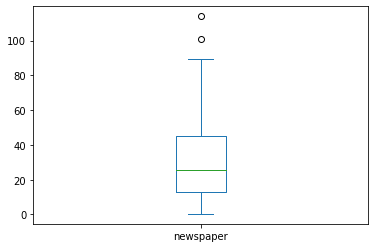

In [20]:
df['newspaper'].plot.box()

there are few outliers are present

# skewness

In [21]:
df.skew()

tv          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [22]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='tv', ylabel='Density'>

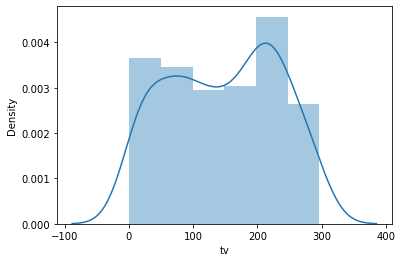

In [23]:
sns.distplot(df['tv'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

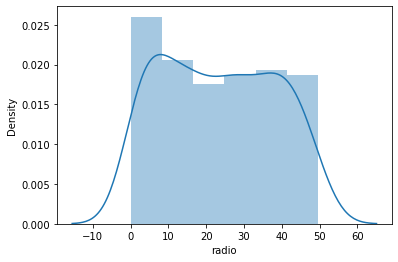

In [24]:
sns.distplot(df['radio'])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

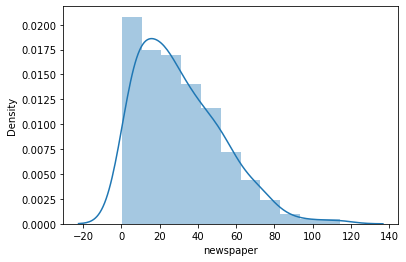

In [25]:
sns.distplot(df['newspaper'])

above data is not normalized

In [26]:
df.corr()['sales']

tv           0.782224
radio        0.576223
newspaper    0.228299
sales        1.000000
Name: sales, dtype: float64

outliers removal

In [27]:
df.shape

(200, 4)

In [28]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))

we see that there are very low outliers present

In [29]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,tv,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


seprating the columns in the features and target variables

In [30]:
features=df.drop("sales", axis=1)
target=df["sales"]

In [31]:
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [32]:
# only for the selection the random value
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train , target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"at random state {i}, the traing accuracy is- {r2_score(target_train,pred_train)}")
    print(f"at random state {i}, the testing accuracy is-{r2_score(target_test,pred_test)}")
    print('\n')

at random state 0, the traing accuracy is- 0.9067114990146383
at random state 0, the testing accuracy is-0.8601145185017867


at random state 1, the traing accuracy is- 0.8959372632325174
at random state 1, the testing accuracy is-0.8927605914615384


at random state 2, the traing accuracy is- 0.9151707412454462
at random state 2, the testing accuracy is-0.7575894500772719


at random state 3, the traing accuracy is- 0.8930288385772915
at random state 3, the testing accuracy is-0.9138375011080566


at random state 4, the traing accuracy is- 0.8911672911176578
at random state 4, the testing accuracy is-0.9085774752313167


at random state 5, the traing accuracy is- 0.8956962280033928
at random state 5, the testing accuracy is-0.8984204533332627


at random state 6, the traing accuracy is- 0.8915418760966582
at random state 6, the testing accuracy is-0.922433347392203


at random state 7, the traing accuracy is- 0.8929164670647455
at random state 7, the testing accuracy is-0.909555060090

at random state 72, the traing accuracy is- 0.8937422087162026
at random state 72, the testing accuracy is-0.9072541868212964


at random state 73, the traing accuracy is- 0.9077573496620701
at random state 73, the testing accuracy is-0.8412998907053818


at random state 74, the traing accuracy is- 0.8979415340515895
at random state 74, the testing accuracy is-0.8806020302645324


at random state 75, the traing accuracy is- 0.8943141208860873
at random state 75, the testing accuracy is-0.9077086876495712


at random state 76, the traing accuracy is- 0.9092025789360757
at random state 76, the testing accuracy is-0.753517499473075


at random state 77, the traing accuracy is- 0.8859758983122314
at random state 77, the testing accuracy is-0.937880163249318


at random state 78, the traing accuracy is- 0.8957285947454089
at random state 78, the testing accuracy is-0.9026908232907813


at random state 79, the traing accuracy is- 0.8917194183285055
at random state 79, the testing accuracy is

In [33]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=92)

In [34]:
lr.fit(features_train , target_train)

LinearRegression()

In [35]:
pred_test=lr.predict(features_test)

In [36]:
print(r2_score(target_test,pred_test))

0.9519707195109461


we see that the r2_score is 95 percent so the model is very good

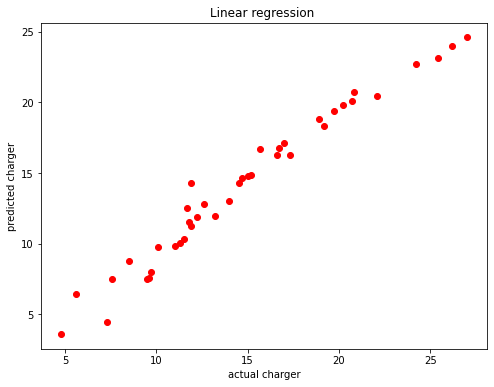

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test , y=pred_test, color='r')
plt.xlabel('actual charger')
plt.ylabel('predicted charger')
plt.title('Linear regression ')
plt.show()

we see that the actual charge and the predicted charge are same way and they get the linear regression

regularazation

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [39]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001, .001, .01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train, target_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [40]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls = ls.predict(features_test)

lss=r2_score(target_test, pred_ls)
lss

0.9514692161714389

In [41]:
cv_score=cross_val_score(ls,features,target,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8882007416256036

the model is excellent

ensemble technique

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'], 'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clt=GridSearchCV(rf,parameters)
clt.fit(features_train,target_train)

print(clt.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [43]:
rf=RandomForestRegressor(criterion='mae',max_features='auto')
rf.fit(features_train, target_train)
rf.score(features_train, target_train)
pred_decision=rf.predict(features_test)

rfs=r2_score(target_test,pred_decision)
print('R2 score', rfs*100)

rfscore=cross_val_score(rf,features,target,cv=5)
rfc=rfscore.mean()
print('Cross Val Score', rfc*100)

R2 score 98.6347748259288
Cross Val Score 97.69068452613737


getting the model result

In [44]:
import pickle
filename='channel.pkl'
pickle.dump(rf,open(filename, 'wb'))

# conclusion

In [45]:
loaded_model=pickle.load(open('channel.pkl','rb'))
result=loaded_model.score(features_test, target_test)
print(result)

0.986347748259288


In [46]:
conclusion=pd.DataFrame([loaded_model.predict(features_test)[:],pred_decision[:]],index=['predicted','original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
predicted,10.236,13.162,9.787,19.695,12.634,16.035,9.577,12.281,9.612,7.241,...,15.123,11.895,17.235,12.004,5.362,19.998,14.74,25.166,12.305,15.366
original,10.236,13.162,9.787,19.695,12.634,16.035,9.577,12.281,9.612,7.241,...,15.123,11.895,17.235,12.004,5.362,19.998,14.74,25.166,12.305,15.366
